In [2]:
import numpy as np
import pandas as pd

# Load processed weather dataset
df = pd.read_csv("dehradun_weather_processed.csv")

# Extract weather attributes
temperature_data = df["temperature_celsius"]
humidity_data = df["humidity"]
conditions = df["condition_text"]

# ✅ Compute real parameters from dataset
# Normal distribution parameters
temp_mean = temperature_data.mean()
temp_std = temperature_data.std()
hum_mean = humidity_data.mean()
hum_std = humidity_data.std()

# Poisson parameter: number of rainy condition days
rain_days = df[df["condition_text"].str.contains("Rain", case=False, na=False)]
lambda_poisson = len(rain_days) / len(df)

# Binomial probability: storm/thunder events
storm_days = df[df["condition_text"].str.contains("Storm|Thunder", case=False, na=False)]
p_storm = len(storm_days) / len(df)

# ✅ Updated sampling functions
def sample_poisson(lam):
    """Generate random number of rain events using Poisson distribution."""
    return np.random.poisson(lam)

def sample_binomial(prob):
    """Decide if thunderstorm occurs using Binomial distribution."""
    return np.random.binomial(1, prob)

def sample_normal(mean, std):
    """Generate real temperature & humidity values."""
    return np.random.normal(mean, std)

# Testing with real dataset parameters
np.random.seed(42)
print("📌 Testing Poisson samples (λ from real rainy days):")
for _ in range(10):
    print(sample_poisson(lambda_poisson), end=' ')
print("\n")

print("⚡ Testing Binomial samples (p Storm/Thunder events):")
for _ in range(10):
    print(sample_binomial(p_storm), end=' ')
print("\n")

print("🌡 Testing Normal Temperature samples (mean, std from dataset):")
for _ in range(10):
    print(round(sample_normal(temp_mean, temp_std), 1), end=' ')
print("\n")

print("💧 Testing Normal Humidity samples:")
for _ in range(10):
    print(round(sample_normal(hum_mean, hum_std), 1), end=' ')
print("\n")


📌 Testing Poisson samples (λ from real rainy days):
0 0 0 0 0 0 0 0 0 0 

⚡ Testing Binomial samples (p Storm/Thunder events):
0 0 0 0 0 0 0 0 0 0 

🌡 Testing Normal Temperature samples (mean, std from dataset):
68.0 69.2 68.0 68.0 68.8 66.4 66.6 67.9 67.4 68.9 

💧 Testing Normal Humidity samples:
50.5 47.9 62.8 54.1 55.6 47.9 52.4 55.8 49.3 57.2 




Extracted Parameters from Dataset:
Average Temp (Mean): 68.54
Temperature Std Dev: 1.13
Storm Probability: 0.1
Estimated λ for Poisson (rain events): 2

Generated Samples Preview:
Poisson: [4 1 3 3 1 2 1 1 2 2]
Binomial: [0 0 0 1 0 0 0 0 0 0]
Normal Temp: [np.float64(68.35), np.float64(68.35), np.float64(67.63), np.float64(67.02), np.float64(70.46), np.float64(67.56), np.float64(70.31), np.float64(67.57), np.float64(69.13), np.float64(67.26)]


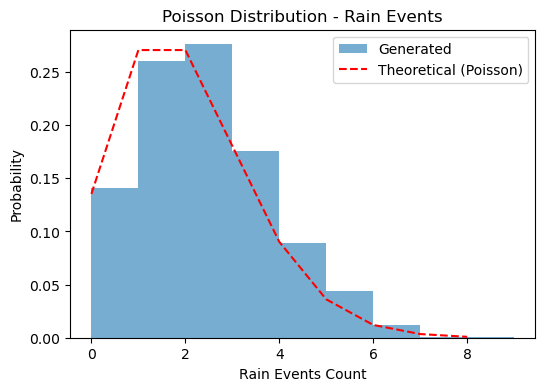

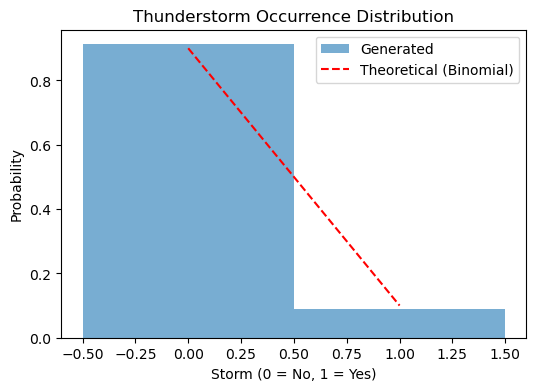

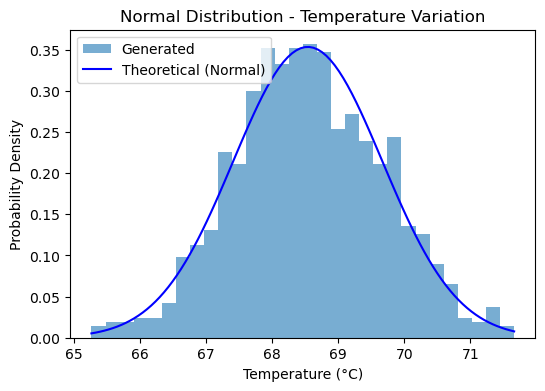

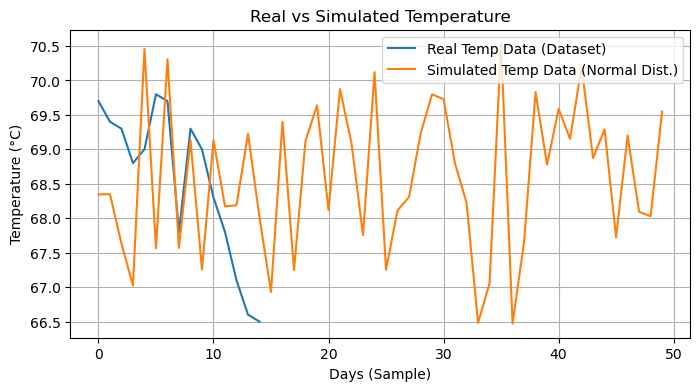

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm

# ------------------------
# Load Processed Dataset
# ------------------------
df = pd.read_csv("dehradun_weather_processed.csv")

# Extract relevant real weather attributes
temperature = df["temperature_celsius"]
humidity = df["humidity"]
wind_speed = df["wind_kph"]
conditions = df["condition_text"]

# Calculate parameters from real data
lam_rain_events = max(df["precip"].mean(), 0.5) if "precip" in df.columns else 2  # fallback if no precipitation data
storm_probability = (conditions.str.contains("Storm|thunder", case=False)).mean() or 0.1
mean_temp = temperature.mean()
std_temp = temperature.std()

# Debugging Prints
print("\nExtracted Parameters from Dataset:")
print("Average Temp (Mean):", round(mean_temp, 2))
print("Temperature Std Dev:", round(std_temp, 2))
print("Storm Probability:", round(storm_probability, 3))
print("Estimated λ for Poisson (rain events):", round(lam_rain_events, 2))

# ------------------------
# Weather Simulation Functions
# ------------------------
def sample_poisson(lam, size=1000):
    """Generate random number of rain events using Poisson distribution."""
    return np.random.poisson(lam, size)

def sample_binomial(prob, size=1000):
    """Decide if thunderstorm occurs using Binomial distribution."""
    return np.random.binomial(1, prob, size)

def sample_normal(mean, std, size=1000):
    """Generate continuous weather attributes (temperature)."""
    return np.random.normal(mean, std, size)

# Fix seed for reproducibility
np.random.seed(42)

# Generate samples based on dataset values ✅
poisson_samples = sample_poisson(lam_rain_events)
binomial_samples = sample_binomial(storm_probability)
normal_samples = sample_normal(mean_temp, std_temp)

# Print first 10 samples to verify
print("\nGenerated Samples Preview:")
print("Poisson:", poisson_samples[:10])
print("Binomial:", binomial_samples[:10])
print("Normal Temp:", [round(val, 2) for val in normal_samples[:10]])

# ------------------------
# Visualization
# ------------------------

# 1️⃣ Poisson Histogram (Rain Events)
plt.figure(figsize=(6,4))
plt.hist(poisson_samples, bins=range(0, max(poisson_samples)+2), density=True, alpha=0.6, label='Generated')
x = np.arange(0, max(poisson_samples)+1)
plt.plot(x, poisson.pmf(x, mu=lam_rain_events), 'r--', label='Theoretical (Poisson)')
plt.title("Poisson Distribution - Rain Events")
plt.xlabel("Rain Events Count")
plt.ylabel("Probability")
plt.legend()
plt.show()

# 2️⃣ Binomial Histogram (Storm Probability)
plt.figure(figsize=(6,4))
plt.hist(binomial_samples, bins=[-0.5,0.5,1.5], density=True, alpha=0.6, label='Generated')
x = [0, 1]
plt.plot(x, binom.pmf(x, n=1, p=storm_probability), 'r--', label='Theoretical (Binomial)')
plt.title("Thunderstorm Occurrence Distribution")
plt.xlabel("Storm (0 = No, 1 = Yes)")
plt.ylabel("Probability")
plt.legend()
plt.show()

# 3️⃣ Normal Histogram (Temperature)
plt.figure(figsize=(6,4))
plt.hist(normal_samples, bins=30, density=True, alpha=0.6, label='Generated')
x = np.linspace(min(normal_samples), max(normal_samples), 100)
plt.plot(x, norm.pdf(x, loc=mean_temp, scale=std_temp), 'b-', label='Theoretical (Normal)')
plt.title("Normal Distribution - Temperature Variation")
plt.xlabel("Temperature (°C)")
plt.ylabel("Probability Density")
plt.legend()
plt.show() 

# ------------------------
# Real vs Simulated Temperature Comparison
# ------------------------
plt.figure(figsize=(8,4))
plt.plot(temperature.values[:50], label="Real Temp Data (Dataset)")
plt.plot(normal_samples[:50], label="Simulated Temp Data (Normal Dist.)")
plt.title("Real vs Simulated Temperature")
plt.xlabel("Days (Sample)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

